# The objectives:
1. Decsion Tree (DT) pruning methods.
2. Decision Tree visualization.
3. Ensemble methods:
   - Voting
   - Bagging
   - Boosting
4. Regression in DT and SVM.

# Decision Tree (DT) and overfitting

## [Pruning solution][1]

To cut sub-tree(s) (nodes) from the tree that add very little to the classification power of the tree to:
1. Increase the proformance.
2. Reduce the model comlexity and the overfitting respectively.

## [Pruning types][2]

We may try to:
1. <u> <b> pre-prune</b></u> a DT by stoping growring the tree early (Early stopping).
2. <u> <b> post-prune</b></u> a DT after we build the tree to go from up to bottom or from bottom to up.

In all cases, [we want to use][3]:
1. The validation dataset; pruned subtree(s) as a hyper-paramter.
2. Use some heuristics such as:
    - Max leaf_nodes, Min samples_leaf, and/or Max depth (Usually in the early stopping method).
    - Reducing or estimation classification error in the validation dataset (Usually in post-pruning).
    - Information theary methods (e.g. Chi-squared, information gain, gain ratio,...) in both pruning types.

## [Pruning in python][4]

Pruning helps us to avoid overfitting. Generally it is preferred to have a simple model, it avoids overfitting issue. Any additional split that does not add significant value is not worth while.<br/><br/>
We can avoid overfitting by changing the parameters like
  - max_leaf_nodes
  - min_samples_leaf
  - max_depth




[1]:https://en.wikipedia.org/wiki/Decision_tree_pruning
[2]:https://www.saedsayad.com/decision_tree_overfitting.htm
[3]:https://pdfs.semanticscholar.org/025b/8c109c38dc115024e97eb0ede5ea873fffdb.pdf
[4]:https://statinfer.com/204-3-10-pruning-a-decision-tree-in-python/


### Data preparation

In [1]:
#All-in-one:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

pima= pd.read_csv("~/DATA/pima.csv")  # Load the data
X = pima[pima.columns[0:8]]
y = pima[pima.columns[8]]


scaler = MinMaxScaler(copy=True,feature_range=(0, 1))
rescaledX=scaler.fit_transform(X)

In [2]:
from sklearn.model_selection import StratifiedKFold,train_test_split
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2019)
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.33, random_state=2019, stratify=y)

In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import sklearn.tree
from sklearn.metrics import accuracy_score,confusion_matrix

### DT in sklearn

In [4]:
import sklearn.tree
help (sklearn.tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

### Run DT with visualization

In [5]:

confusionMatrix=[]
Results=[]
clf=sklearn.tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
with open('DTout.txt', "w") as f:
    f = sklearn.tree.export_graphviz(clf, 
                        class_names=['No','Yes'],
                        feature_names= pima.columns[0:8],
                        rounded=True,
                        filled=True,
                        out_file=f)



pred =clf.predict(X_test)
tn, fp, fn, tp=confusion_matrix(y_test,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_test, pred))


print(Results[0])
print(confusionMatrix[0])

0.7401574803149606
[143, 22, 44, 45]


To draw the below figure in the web browser:

1. Retrieve the output [text file][1]
2. Cut and paste the content and Go to the http://www.webgraphviz.com/ to visualize.

[1]:https://bmi6015.jupyter.med.utah.edu/user/u0852921/edit/work/BMI6015-2019-draft/09-28-2019/DTclassifier_MIMICALL.txt

In [6]:
#from IPython.display import Image  
#import pydotplus
#graph = pydotplus.graph_from_dot_data(DTout.txt.getvalue())  
#Image(graph.create_png())

### Run DT with different max_depth

In [7]:
confusionMatrix=[]
Results=[]
clf=sklearn.tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
pred =clf.predict(X_test)
tn, fp, fn, tp=confusion_matrix(y_test,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_test, pred))

clf=sklearn.tree.DecisionTreeClassifier(max_depth=7)
clf.fit(X_train,y_train)
pred =clf.predict(X_test)
tn, fp, fn, tp=confusion_matrix(y_test,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_test, pred))


clf=sklearn.tree.DecisionTreeClassifier(max_depth=9)
clf.fit(X_train,y_train)
pred =clf.predict(X_test)
tn, fp, fn, tp=confusion_matrix(y_test,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_test, pred))

clf=sklearn.tree.DecisionTreeClassifier(max_depth=11)
clf.fit(X_train,y_train)
pred =clf.predict(X_test)
tn, fp, fn, tp=confusion_matrix(y_test,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_test, pred))

print(Results)
print(confusionMatrix)

[0.7401574803149606, 0.7322834645669292, 0.7047244094488189, 0.7047244094488189]
[[143, 22, 44, 45], [139, 26, 42, 47], [130, 35, 40, 49], [132, 33, 42, 47]]


## [Ensemble Methods](https://en.wikipedia.org/wiki/Ensemble_learning)


Ensemble method is to create several weak classifiers that each one has its own local task to learn from subset/whole features or dataset. Each classifier may increase its performance from learning the others' mistakes or from repeating its learning tasks from its misclassification examples over the training dataset(s). Then it aggregates the classifiers' results to have better predictions.

It improves in general the performance but it degrades the interpretability. Sometimes, when many weak classifiers result in poor results, the ensemble method gets worse results than some weakers.

# Ensemble Methods: Voting classifier

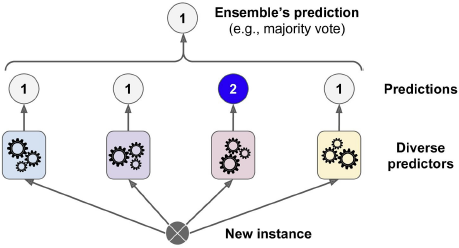

# Ensemble Methods: Boosting classifier

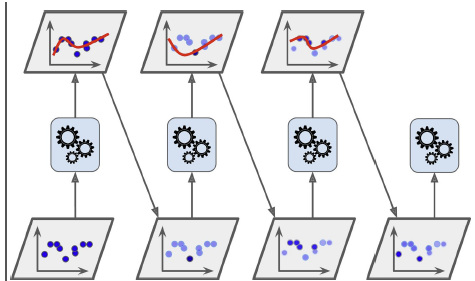

## Ensemble Methods: 
####  [Bagging (Bootstrap aggregating)](https://en.wikipedia.org/wiki/Bootstrap_aggregating) classifier

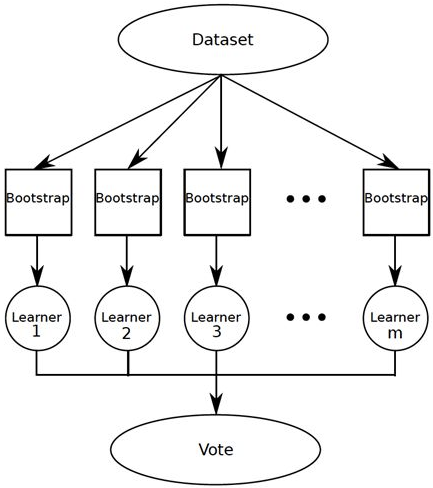


### [Bagging in Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

if no replacement, then pasting

### Bagging example

In [8]:
def baggingClassifiers():
    # This example is taken from https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb 


   from sklearn.ensemble import BaggingClassifier
   from sklearn.tree import DecisionTreeClassifier
   from sklearn.metrics import accuracy_score
   

   bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators=500,
            max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
   bag_clf.fit(X_train, y_train)
   y_pred = bag_clf.predict(X_test)
   print('Bagging tree',accuracy_score(y_test, y_pred))
     

   tree_clf = DecisionTreeClassifier(random_state=42)
   tree_clf.fit(X_train, y_train)
   y_pred_tree = tree_clf.predict(X_test)
   print('Decision Tree', accuracy_score(y_test, y_pred_tree))

In [9]:
baggingClassifiers()

Bagging tree 0.7519685039370079
Decision Tree 0.7047244094488189


### Voting Example

In [10]:
def votingClassifiers():
    # This example is taken from https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb 


    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import VotingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    

    log_clf = LogisticRegression(random_state=42)
    ds_clf = DecisionTreeClassifier(random_state=42)
    svm_clf = SVC(random_state=42)


    voting_clf = VotingClassifier(
            estimators=[('lr', log_clf), ('ds', ds_clf), ('svc', svm_clf)],
            voting='hard')
     
    for clf in (log_clf, ds_clf, svm_clf, voting_clf):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [11]:
votingClassifiers()

LogisticRegression 0.7637795275590551
DecisionTreeClassifier 0.7047244094488189
SVC 0.7637795275590551
VotingClassifier 0.7677165354330708


# Regression with SVM and DT

Read the book..